In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import torchaudio
from IPython.display import Audio

In [2]:
# Two image version
def plot_melspectrogram(path_to_noisy_clip, path_to_clean_clip):

    sr, noisy = wavfile.read(path_to_noisy_clip)
    sr, clean = wavfile.read(path_to_clean_clip)

    noisy = noisy.astype(np.float32)
    clean = clean.astype(np.float32)

    # setting up the plot

    fig, ax = plt.subplots(nrows=1, ncols=2)
    fig.set_figwidth(21)
    fig.set_figheight(8)
    n, hop_length = 128, 128

    # noisy

    S = librosa.feature.melspectrogram(noisy, sr=sr, n_fft=2048, hop_length=hop_length, n_mels=n)
    S_DB = librosa.power_to_db(S, ref=np.max)
    img1 = librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel', ax=ax[0])
    ax[0].set(title='Noisy clip')

    # clean

    S = librosa.feature.melspectrogram(clean, sr=sr, n_fft=2048, hop_length=hop_length, n_mels=n)
    S_DB = librosa.power_to_db(S, ref=np.max)
    img2 = librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel', ax=ax[1])
    ax[1].set(title='Clean clip')

    # plot

    _ = fig.colorbar(img1, ax=[ax[0], ax[1]])


/Users/chris/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/chris/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


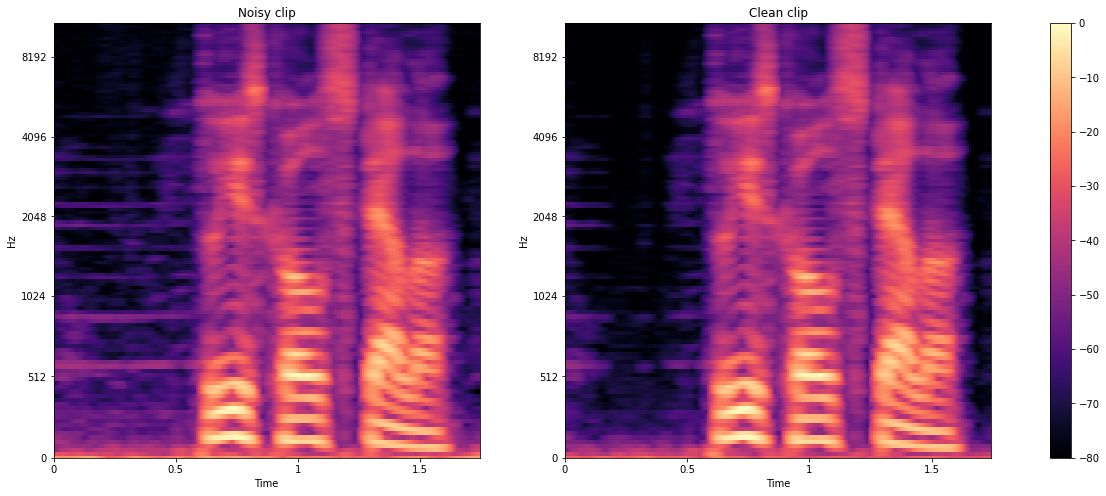

In [4]:
plot_melspectrogram(
    '/Users/chris/Documents/fourthbrain/midpoint_class_projects/sound_files_for_our_midpoint/denoiser_400_epochs/samples/p232_001_resampled_noisy.wav',
    '/Users/chris/Documents/fourthbrain/midpoint_class_projects/sound_files_for_our_midpoint/denoiser_400_epochs/samples/p232_001_resampled_enhanced.wav')

In [52]:
# Version with clean, noisy, and enhanced to allow for visual comparison between clean and enhanced
def plot_melspectrogram_with_enhanced_v3(clip_number):
    sr_noisy, noisy = wavfile.read(f'/Users/chris/Documents/fourthbrain/midpoint_class_projects/sound_files_for_our_midpoint/denoiser_400_epochs/samples/{clip_number}_resampled_noisy.wav')
    sr_clean, clean = wavfile.read(f'/Users/chris/Documents/fourthbrain/week_10/sound_data/VALENTINI/clean_testset_wav/{clip_number}.wav')
    sr_enhanced, enhanced = wavfile.read(f'/Users/chris/Documents/fourthbrain/midpoint_class_projects/sound_files_for_our_midpoint/denoiser_400_epochs/samples/{clip_number}_resampled_enhanced.wav')

    # text
    with open(f'/Users/chris/Documents/fourthbrain/week_10/sound_data/VALENTINI/testset_txt/{clip_number}.txt') as fp:
        text = fp.read()
    
    noisy = noisy.astype(np.float32)
    clean = clean.astype(np.float32)
    enhanced = enhanced.astype(np.float32)

    # setting up the plot
    fig, ax = plt.subplots(nrows=1, ncols=3)
    fig.set_figwidth(26)
    fig.set_figheight(8)
    n, hop_length = 128, 128 #was 128, trying 512

    # noisy
    S = librosa.feature.melspectrogram(noisy, sr=sr_noisy, n_fft=2048, hop_length=hop_length, n_mels=n)
    S_DB = librosa.power_to_db(S, ref=np.max)
    img1 = librosa.display.specshow(S_DB, sr=sr_noisy, hop_length=hop_length, x_axis='time', y_axis='mel', ax=ax[0])
    ax[0].set(title='Noisy clip') 

    # clean
    S = librosa.feature.melspectrogram(clean, sr=sr_clean, n_fft=2048, hop_length=hop_length, n_mels=n)
    S_DB = librosa.power_to_db(S, ref=np.max)
    img2 = librosa.display.specshow(S_DB, sr=sr_clean, hop_length=hop_length, x_axis='time', y_axis='mel', ax=ax[1])
    ax[1].set(title='Clean clip')
    
    # enhanced
    S = librosa.feature.melspectrogram(enhanced, sr=sr_enhanced, n_fft=2048, hop_length=hop_length, n_mels=n)
    S_DB = librosa.power_to_db(S, ref=np.max)
    img3 = librosa.display.specshow(S_DB, sr=sr_enhanced, hop_length=hop_length, x_axis='time', y_axis='mel', ax=ax[2])
    ax[2].set(title='Enhanced clip')

    # plot
    _ = fig.colorbar(img1, ax=[ax[0], ax[1], ax[2]]);
    plt.savefig(f'{clip_number}_spectrogram_comparison.png')
    
    print(text)


### Positive Examples Visualized

She can scoop these things into three red bags, and we will go meet her Wednesday at the train station. 



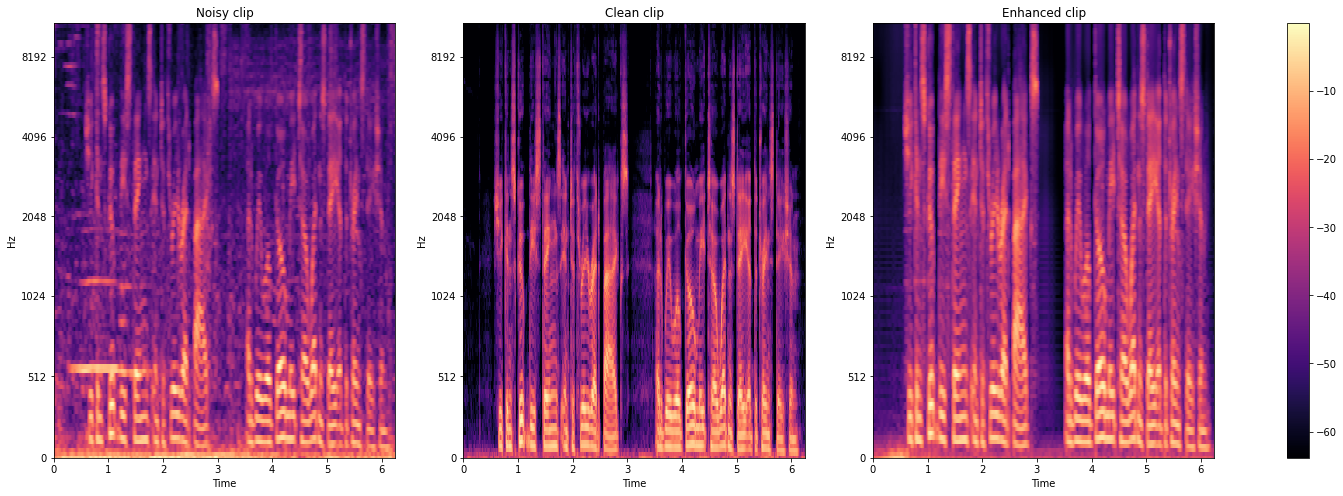

In [53]:
# v3: noisy, clean, enhanced
plot_melspectrogram_with_enhanced_v3('p232_005')

I'm so angry.



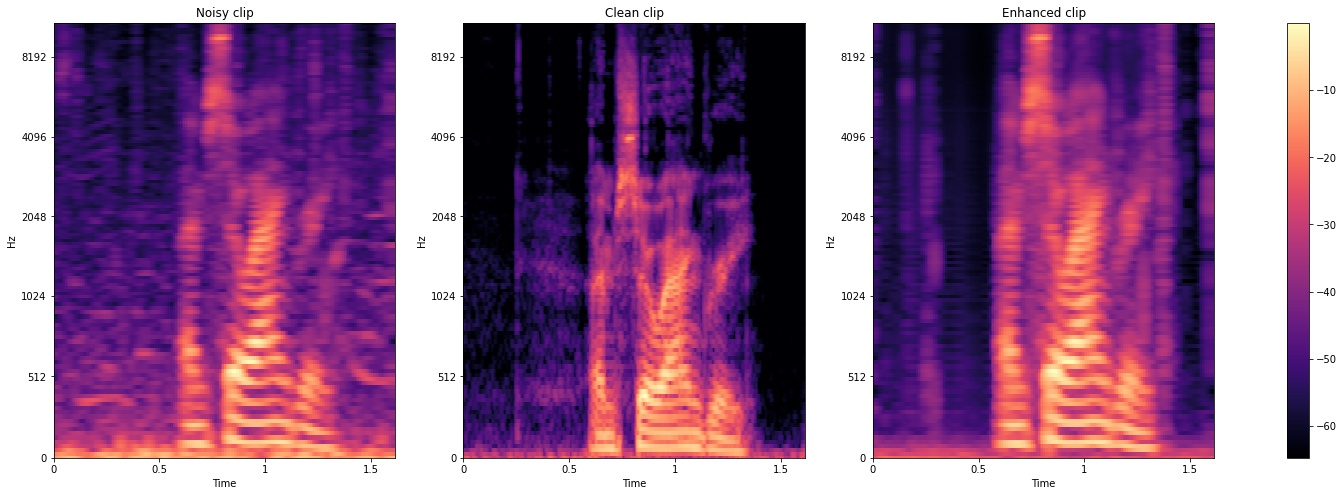

In [54]:
# v3: noisy, clean, enhanced
plot_melspectrogram_with_enhanced_v3('p232_125')

I do not want to have a fight with Mr Hastings.



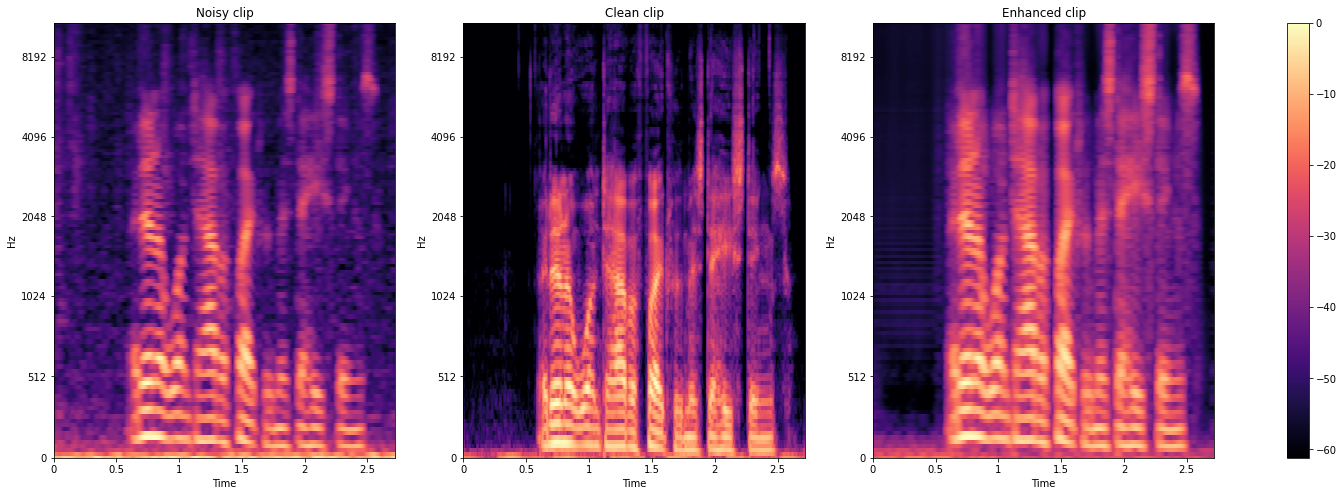

In [55]:
# v3: noisy, clean, enhanced
plot_melspectrogram_with_enhanced_v3('p232_142')

### Negative Examples Visualized

The actual primary rainbow observed is said to be the effect of super-imposition of a number of bows. 



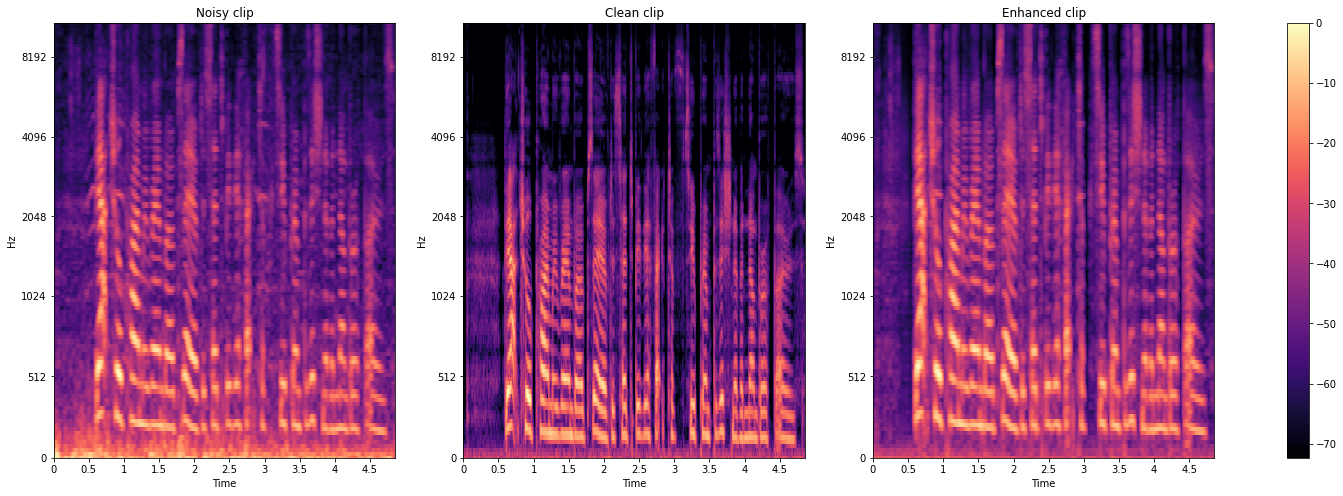

In [56]:
# v3: noisy, clean, enhanced
plot_melspectrogram_with_enhanced_v3('p257_022')

The first minister is obviously concerned to hear about this incident.



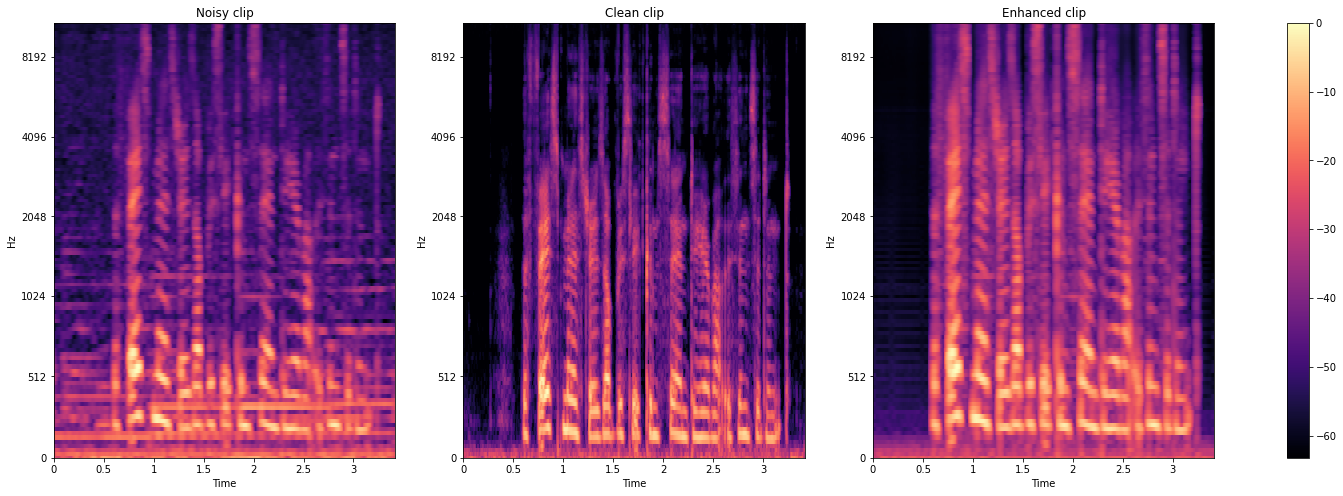

In [57]:
# v3: noisy, clean, enhanced
plot_melspectrogram_with_enhanced_v3('p257_430')

In [33]:
def load_audio_and_generate_audio_clip_number(clip_number, clip_type):
    # Read in with torchaudio
    if clip_type == 'clean':
        waveform, sample_rate = torchaudio.load(f'/Users/chris/Documents/fourthbrain/week_10/sound_data/VALENTINI/clean_testset_wav/{clip_number}.wav')
    elif clip_type =='noisy':
        waveform, sample_rate = torchaudio.load(f'/Users/chris/Documents/fourthbrain/midpoint_class_projects/sound_files_for_our_midpoint/denoiser_400_epochs/samples/{clip_number}_resampled_noisy.wav')
    else:
        waveform, sample_rate = torchaudio.load(f'/Users/chris/Documents/fourthbrain/midpoint_class_projects/sound_files_for_our_midpoint/denoiser_400_epochs/samples/{clip_number}_resampled_enhanced.wav')

    # torchaudio.transforms.Resample(orig_freq: int = 16000, new_freq: int = 16000, resampling_method: str = 'sinc_interpolation')
    # Resample down to 16 kHz (default in Resample)
    resample = torchaudio.transforms.Resample(orig_freq=sample_rate)

    # New downsampled version
    new_clip = resample(waveform)
    return Audio(new_clip, rate=16000)

In [34]:
load_audio_and_generate_audio_clip_number('p232_001', 'clean')

In [35]:
load_audio_and_generate_audio_clip_number('p232_001', 'noisy')

In [36]:
load_audio_and_generate_audio_clip_number('p232_001', 'enhanced')

Positives:
- p232_005
- p232_125
- p232_142

Negatives:
- p257_022
- p257_430